In [23]:
library(rstan)
library(here)
library(bayesplot)
library(ggfortify)
library(gridExtra)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

source(here("plotSSM.r"), encoding = "utf-8")


In [24]:
# データの読み込み
sales_df_4 <- read.csv(here("data", "5-6-1-sales-ts-4.csv"))
sales_df_4$date <- as.POSIXct(sales_df_4$date)
head(sales_df_4, n = 3)


,date,sales
,<dttm>,<dbl>
1,2010-01-01,81.1
2,2010-01-02,127.7
3,2010-01-03,119.5


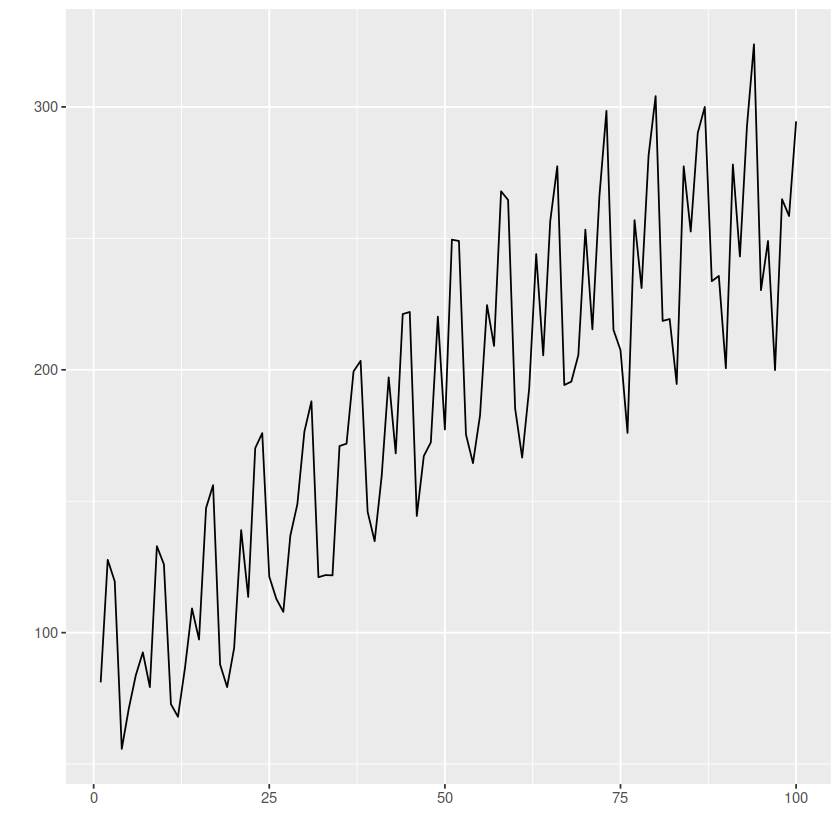

In [19]:
# 図示
autoplot(ts(sales_df_4[, -1]))


In [25]:
data_list <- list(
  y = sales_df_4$sales,
  T = nrow(sales_df_4)
)

basic_structual <- stan(
  file = "5-6-1-basic-structual-time-series.stan",
  data = data_list,
  seed = 1,
  iter = 8000,
  warmup = 2000,
  thin = 6,
  control = list(adapt_delta = 0.97, max_treedepth = 15)
)


Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [26]:
print(
  basic_structual,
  par = c("s_z", "s_s", "s_b", "lp__"),
  probs = c(0.025, 0.5, 0.975)
)


ERROR: Error in check_pars(allpars, pars): no parameter s_b


In [ ]:
mcmc_sample <- rstan::extract(basic_structual)

p_all <- plotSSM(
  mcmc_sample = mcmc_sample,
  time_vec = sales_df_4$date,
  obs_vec = sales_df_4$sales,
  state_name = "alpha",
  graph_title = "すべての成分を含んだ推定状態値",
  y_label = "sales"
)

p_trend <- plotSSM(
  mcmc_sample = mcmc_sample,
  time_vec = sales_df_4$date,
  obs_vec = sales_df_4$sales,
  state_name = "mu",
  graph_title = "周期成分を除いた状態推定値",
  y_label = "sales"
)

p_cycle <- plotSSM(
  mcmc_sample = mcmc_sample,
  time_vec = sales_df_4$date,
  state_name = "gamma",
  graph_title = "周期成分",
  y_label = "gamma"
)

grid.arrange(p_all, p_trend, p_cycle)


Stan model 'anon_model' does not contain samples.


ERROR: Error in apply(X = mcmc_sample[[state_name]], MARGIN = 2, quantile, probs = c(0.025, : dim(X) は正の長さでなければなりません
